#Libraries

In [ ]:
import pandas as pd
!pip install mplsoccer
import numpy as np
import seaborn as sns
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch,add_image,PyPizza, FontManager
from matplotlib.colors import to_rgba
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
rcParams['text.color'] = 'black'
from mplsoccer import FontManager
import matplotlib.patheffects as path_effects
from PIL import Image
!pip install highlight_text
from highlight_text import ax_text
from urllib.request import urlopen
from matplotlib.cm import get_cmap
import os
from PIL import Image
from io import BytesIO
import requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Reading the data

**Tenho que copiar a este dicionário que sai no Jupyter (é o primeiro). Depois guardo o dicionário com o nome para a variável playerIdNameDictionary.**

**Exemplo de output**

{"playerIdNameDictionary":{"430413":"Nélson da Luz","351703":"André Silva","297541":"Nicolas Janvier","322790":"Bruno Gaspar","351604":"Jorge Fernandes","396579":"Celton Biai","408432":"André Amaro","412912":"Hélder Sá","107158":"Bruno Varela","437999":"Dani Silva","318502":"Mikel Villanueva","319796":"Michael Johnston","432629":"Ibrahima Bamba","431674":"Miguel Maga","444826":"Jota Silva","444828":"Matheus Índio","447235":"Afonso Freitas","454565":"Mamadou Tounkara","460211":"Gonçalo Nogueira","383185":"Safira","132273":"Wendell","338791":"Pepê Aquino","388685":"Gabriel Veron","351744":"Stephen Eustáquio","114301":"Mateus Uribe","358801":"Mehdi Taremi","373842":"Diogo Costa","395173":"João Mário","421893":"André Franco","422950":"Rodrigo Conceição","424768":"Gonçalo Borges","120608":"Otávio","10105":"Pepe","322683":"Cláudio Ramos","322771":"Fábio Cardoso","347204":"Galeno","244779":"Marko Grujic","280060":"Toni Martínez","28521":"Iván Marcano","342857":"Danny Namaso"}

In [ ]:
df = pd.read_csv('result.csv')

In [ ]:
playerIdNameDictionary = {"132273":"Wendell","338791":"Pepê Aquino","388685":"Gabriel Veron","310029":"Samuel","351744":"Stephen Eustáquio","114301":"Matheus Uribe","358801":"Mehdi Taremi","425384":"Abraham Marcus","422950":"Rodrigo Conceição","421893":"André Franco","374812":"David Carmo","120608":"Otávio","322683":"Cláudio Ramos","342701":"Wilson Manafá","322771":"Fábio Cardoso","347204":"Galeno","244779":"Marko Grujic","28521":"Iván Marcano","280060":"Toni Martínez","342857":"Daniel Namaso","337878":"Lucas Ventura","130506":"Welinton Júnior","419111":"Matheus Nogueira","116103":"Carlinhos","136134":"Lucas","373524":"Yony González","308886":"Fahd Moufi","271553":"Bryan Róchez","126293":"Kosuke Nakamura","442977":"Sérgio Conceição","422207":"Filipe Relvas","447210":"Gonçalo Costa","391031":"Paulo Estrela","444819":"Rui Gomes","297006":"Moustapha Seck","373777":"Park Ji-Soo","360107":"Pedrão","380683":"Mohamed Lamine Diaby","447215":"Klismahn","445423":"Alemão"}

In [ ]:
playerIdNameDictionary = {float(k):v for k,v in playerIdNameDictionary.items()}

df['playerName'] = df['playerId'].map(playerIdNameDictionary)
df['relatedPlayerName'] =  df['relatedPlayerId'].map(playerIdNameDictionary)

df = df[['id', 'eventId', 'teamId', 'expandedMinute','x', 'y', 'period/value',
         'period/displayName', 'type/value', 'type/displayName',
         'outcomeType/value', 'outcomeType/displayName',
         'playerId', 'playerName', 'isTouch', 'endX', 'endY', 'relatedEventId',
         'relatedPlayerId','relatedPlayerName','blockedX', 'blockedY', 'isGoal', 'isShot']]




In [ ]:
df = df.dropna(subset=['playerName','playerId'])

In [ ]:
hometeam_id = df['teamId'].unique()[1]
awayteam_id = df['teamId'].unique()[0]

hometeam_name = 'FC Porto'
awayteam_name = 'Portimonense'

home_color = 'Blue'
away_color = 'Grey'

In [ ]:
df[df['teamId']== hometeam_id]['playerName'].unique()

array(['Wilson Manafá', 'Pepê Aquino', 'Otávio', 'Matheus Uribe',
       'Galeno', 'Iván Marcano', 'Wendell', 'Fábio Cardoso',
       'Cláudio Ramos', 'Toni Martínez', 'Mehdi Taremi', 'Daniel Namaso',
       'André Franco', 'Gabriel Veron', 'Abraham Marcus'], dtype=object)

In [ ]:
df[df['teamId']== awayteam_id]['playerName'].unique()

array(['Mohamed Lamine Diaby', 'Pedrão', 'Welinton Júnior',
       'Yony González', 'Klismahn', 'Park Ji-Soo', 'Moustapha Seck',
       'Lucas Ventura', 'Fahd Moufi', 'Filipe Relvas', 'Kosuke Nakamura',
       'Bryan Róchez', 'Carlinhos', 'Rui Gomes', 'Gonçalo Costa'],
      dtype=object)

In [ ]:
df.columns

Index(['id', 'eventId', 'teamId', 'expandedMinute', 'x', 'y', 'period/value',
       'period/displayName', 'type/value', 'type/displayName',
       'outcomeType/value', 'outcomeType/displayName', 'playerId',
       'playerName', 'isTouch', 'endX', 'endY', 'relatedEventId',
       'relatedPlayerId', 'relatedPlayerName', 'blockedX', 'blockedY',
       'isGoal', 'isShot'],
      dtype='object')

# Info about the data and how to interpreter the data (no need to run)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1600 non-null   int64  
 1   eventId                  1600 non-null   int64  
 2   teamId                   1600 non-null   int64  
 3   expandedMinute           1600 non-null   int64  
 4   x                        1600 non-null   float64
 5   y                        1600 non-null   float64
 6   period/value             1600 non-null   int64  
 7   period/displayName       1600 non-null   object 
 8   type/value               1600 non-null   int64  
 9   type/displayName         1600 non-null   object 
 10  outcomeType/value        1600 non-null   int64  
 11  outcomeType/displayName  1600 non-null   object 
 12  playerId                 1586 non-null   float64
 13  playerName               1586 non-null   object 
 14  isTouch                 

**Coordenadas x e y variam de 0 a 100**

In [ ]:
df1['y'].max()
#df['y'].min()
#df['x'].max()
#dx['x'].min()

100.0

**Event type info**

In [ ]:
df['type/displayName'].unique()

array(['Start', 'Pass', 'BallTouch', 'Dispossessed', 'Tackle',
       'BallRecovery', 'TakeOn', 'Foul', 'Interception', 'Aerial',
       'BlockedPass', 'Clearance', 'KeeperPickup', 'Challenge', 'Punch',
       'SavedShot', 'Save', 'CornerAwarded', 'MissedShots',
       'OffsideGiven', 'OffsidePass', 'OffsideProvoked', 'Goal', 'Error',
       'KeeperSweeper', 'Card', 'Claim', 'End', 'SubstitutionOff',
       'SubstitutionOn', 'FormationChange', 'FormationSet'], dtype=object)

In [ ]:
df['type/value'].unique()

array([   32,     1,    61,    50,     7,    49,     3,     4,     8,
          44,    74,    12,    52,    45,    41,    15,    10,     6,
          13, 10000,     2,    55,    16,    51,    59,    17,    11,
          30,    18,    19,    40,    34])

In [ ]:
df['eventId'].unique()

array([   2,    3,    4, ...,  698, 1088,    1])

**Outcome info**

In [ ]:
df['outcomeType/displayName'].unique()

array(['Successful', 'Unsuccessful'], dtype=object)

In [ ]:
df['outcomeType/value'].unique()

array([1, 0])

**Minutes**

In [ ]:
df['expandedMinute'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70,
       71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

**Period of the game**

In [ ]:
df['period/displayName'].unique()

array(['FirstHalf', 'SecondHalf', 'PostGame', 'PreMatch'], dtype=object)

In [ ]:
df['period/value'].unique()

array([ 1,  2, 14, 16])

**Blocked X e Y**

In [ ]:
df['blockedX'].unique()
df['blockedY'].unique()

array([ nan, 36.6, 49.6, 51.1, 25.1, 41. , 45.3, 50.2, 50.7, 36.8, 39.5,
       48.6, 68.2])

**True or Null**

In [ ]:
df['isGoal'].unique()
df['isShot'].unique()
df['isTouch'].unique()


array([False,  True])

In [ ]:
df['teamId'].unique()

array([ 297, 1463])

In [ ]:
df[['playerName','playerId','teamId']].head(15)

In [ ]:
df.info()

#Vizzes

# Functions

#Heatmap geral

In [ ]:
def team_heatmap_geral(team_id, cmap,title,df):
  df = df[df['teamId'] == team_id]
  pitch = Pitch(pitch_type = 'opta',line_color='#000009', line_zorder=2)
  fig, axs = pitch.draw(figsize=(6.6, 10.2))

  kde = pitch.kdeplot(df.x, df.y, ax=axs,
                    # shade using 100 levels so it looks smooth
                    shade=True, levels=100,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    shade_lowest=True,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap=cmap)
  plt.title(title,c='black',fontsize=20, fontweight='heavy', ha='center', va='bottom')
  ax2 = fig.add_axes([.81,.29,.13,.09])
  ax2.axis('off')
  img2 = Image.open('/content/Half Space Preto.png')
  ax2.imshow(img2)

  fig.text(x=.27,y=0.28,s='Direction of attack',fontstyle='italic',fontweight='heavy',fontsize=14,fontfamily='DejaVu Sans',color='black')
  ax3 = fig.add_axes([.6,.245,.11,.08])
  ax3.axis('off')
  img3 = Image.open('/content/arrow_right.png')
  ax3.imshow(img3)
  plt.savefig(title + '.png',dpi=500,bbox_inches = 'tight',facecolor='white')

#team_heatmap_geral(hometeam_id, home_color +'s', hometeam_name + '\nAll events heatmap',df)
#team_heatmap_geral(awayteam_id, away_color +'s', awayteam_name + '\nAll events heatmap',df)

# Heatmap open-play (event pass)

In [ ]:
def team_heatmap_event(team_id, event_type, cmap,title,df):

  df = df[df['teamId'] == team_id]
  df = df[df['type/displayName'] == event_type]
  pitch = Pitch(pitch_type = 'opta',line_color='#000009', line_zorder=2)
  fig, axs = pitch.draw(figsize=(6.6, 10.2))

  kde = pitch.kdeplot(df.x, df.y, ax=axs,
                    # shade using 100 levels so it looks smooth
                    shade=True, levels=100,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    shade_lowest=True,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap=cmap)
  plt.title(title,c='black',fontsize=20,fontweight='heavy',ha='center',va='bottom')
  ax2 = fig.add_axes([.81,.29,.13,.09])
  ax2.axis('off')
  img2 = Image.open('/content/Half Space Preto.png')
  ax2.imshow(img2)

  fig.text(x=.27,y=0.28,s='Direction of attack',fontstyle='italic',fontweight='heavy',fontsize=14,fontfamily='DejaVu Sans',color='black')
  ax3 = fig.add_axes([.6,.245,.11,.08])
  ax3.axis('off')
  img3 = Image.open('/content/arrow_right.png')
  ax3.imshow(img3)
  plt.savefig(title + '.png',dpi=500,bbox_inches = 'tight',facecolor='white')

#team_heatmap_event(hometeam_id, 'Pass', home_color +'s', hometeam_name + '\nOpen-Play heatmap',df)
#team_heatmap_event(awayteam_id, 'Pass', away_color +'s', awayteam_name + '\nOpen-Play heatmap',df)

# heatmap ball recovery

In [ ]:
# team_heatmap_event(hometeam_id, 'BallRecovery', home_color +'s', hometeam_name + '\nBall recovery heatmap',df)
# team_heatmap_event(awayteam_id, 'BallRecovery', away_color +'s', awayteam_name + '\nBall recovery heatmap',df)

# voronoi

<ipython-input-179-7c3acc75e6ab>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team2['x'] = 100-df_team2['x']


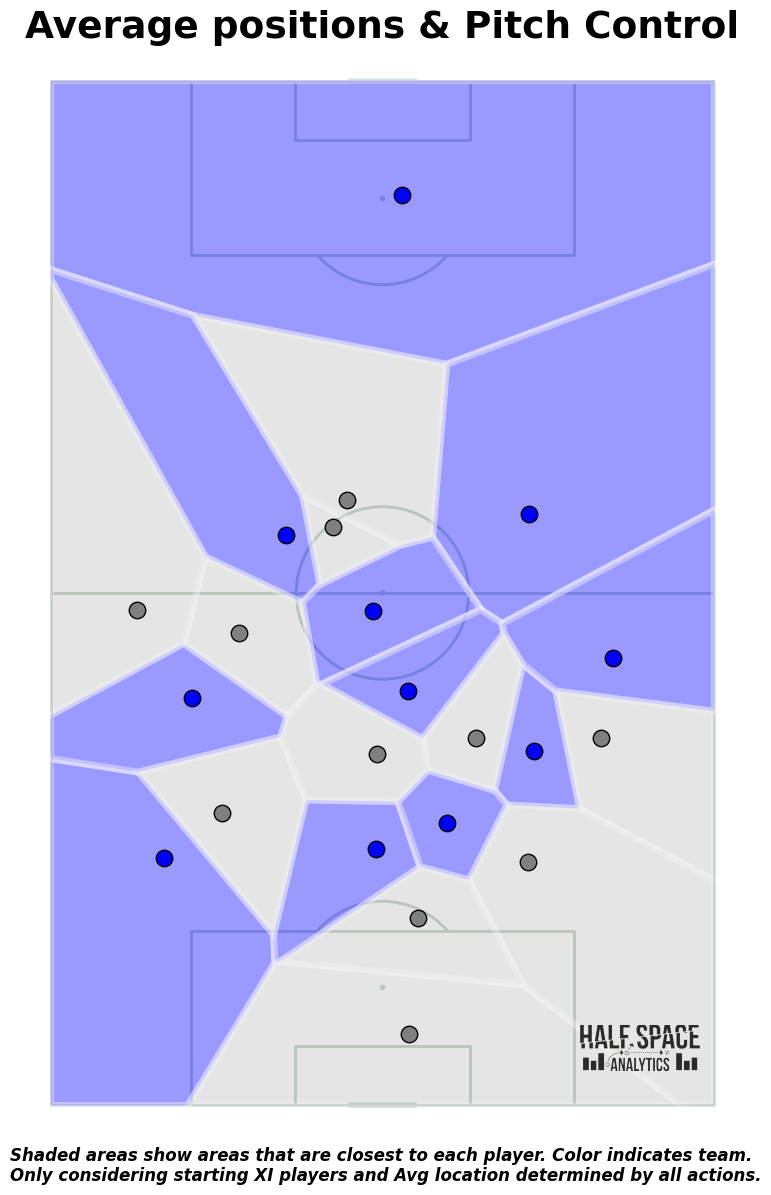

In [ ]:
from matplotlib import font_manager

font_path = '/usr/share/fonts/truetype/open-sans/OpenSans-Regular.ttf'
font = font_manager.FontProperties(fname=font_path)

def voronoi_game(df,home_id, away_id, color_scatter_home, polygon_color_away,color_scatter_away, polygon_color_home):
  min_sub1 = df[(df['teamId'] == away_id) & (df['type/displayName']=='SubstitutionOff')]['expandedMinute'].values.min()
  min_sub1

  df_team1 = df[(df['teamId'] == away_id) & (df['expandedMinute'] < min_sub1) ]
  df_team1['playerName'].unique()

  team1_x = list(df_team1.groupby(['playerName']).mean()['x'])
  team1_y = list(df_team1.groupby(['playerName']).mean()['y'])
  team1 = list(np.zeros((11,),dtype=int)) #lista de zeros # coordenadadas de 11 jogadores

  ##########

  min_sub2 = df[(df['teamId'] == home_id) & (df['type/displayName']=='SubstitutionOff')]['expandedMinute'].values.min()
  min_sub2

  df_team2 = df[(df['teamId'] == home_id) & (df['expandedMinute'] < min_sub2) ]
  df_team2['playerName'].unique()
  df_team2['x'] = 100-df_team2['x']


  opp_x= list(df_team2.groupby(['playerName']).mean()['x'])
  opp_y= list(df_team2.groupby(['playerName']).mean()['y'])
  opp = list(np.ones((11,),dtype=int)) # lista de 1's #coordenadas de 11 jogadores do Betis

  ####

  df_vor = pd.DataFrame({
      'x':team1_x+opp_x,
      'y':team1_y+opp_y,
      'team':team1+opp
  })
  df_vor

  points=np.column_stack((df_vor.x,df_vor.y))
  points

  fig, ax = plt.subplots(figsize=(10,14))
  fig.set_facecolor('white')
  ax.patch.set_facecolor('white')


  pitch = VerticalPitch(pitch_type='opta',pitch_color='white', line_color='#c7d5cc')
  pitch.draw(ax=ax,figsize=(3.125, 4.5))

  x=df_vor.x
  y=df_vor.y
  team_1,team_2 = pitch.voronoi(x,y,df_vor.team)

  t1 = pitch.polygon(team_1, ax=ax, fc=polygon_color_away, ec='white', lw=5, alpha=0.4)
  t2 = pitch.polygon(team_2, ax=ax, fc=polygon_color_home, ec='white', lw=5, alpha=0.2)

  # Plot players
  for i in range(len(df_vor['x'])):
      if df_vor['team'][i]==0:
          pitch.scatter(df_vor['x'][i],df_vor['y'][i],ax=ax,color=color_scatter_away,s=140,edgecolors='black')
      if df_vor['team'][i]==1:
          pitch.scatter(df_vor['x'][i],df_vor['y'][i],ax=ax,color=color_scatter_home,s=140,edgecolors='black')

  plt.title('Average positions & Pitch Control',c='black',fontsize=27,fontweight='heavy',ha='center',va='bottom')

  fig.text(x=.14,y=0.075,s='Shaded areas show areas that are closest to each player. Color indicates team.\nOnly considering starting XI players and Avg location determined by all actions.',fontstyle='italic',fontweight='heavy',fontsize=12,fontfamily='DejaVu Sans',color='black')

  ax2 = fig.add_axes([.71,.13,.12,.08])
  ax2.axis('off')
  img2 = Image.open('/content/Half Space Preto.png')
  ax2.imshow(img2)
  plt.savefig('voronoi.png',dpi=500,bbox_inches = 'tight',facecolor='white')

#voronoi_game(df, hometeam_id, awayteam_id, home_color, home_color, away_color, away_color)


# GK distribution map

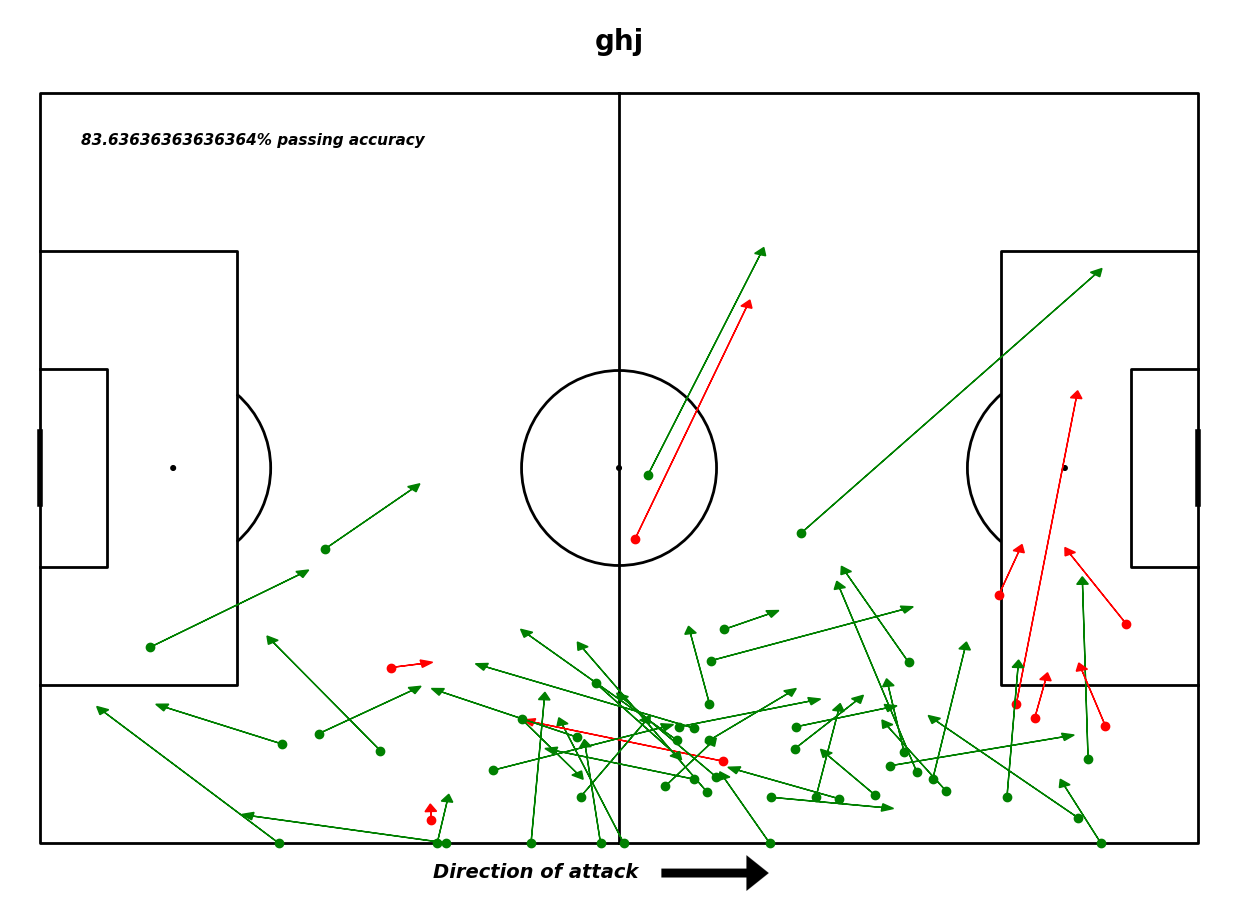

In [ ]:
def generatePlayerPassMap(player_name, title, df):
    df = df[df['type/displayName'] == 'Pass']
    df = df[df['playerName'] == player_name][['x', 'y', 'endX', 'endY','outcomeType/displayName']]
    df = df.dropna(subset=['x', 'y', 'endX','endY'])
    #df['x'] = 100 - df['x']
    #df['endX'] = 100 - df['endX']
    pitch = Pitch(pitch_type='opta',line_color='black',pitch_color='white')
    fig, ax = pitch.grid(grid_height=0.9,axis=False, title_height=0.06,endnote_height=0.04, title_space=0, endnote_space=0)
    for i in df.index:
        x = df['x'][i]
        y = df['y'][i]
        dx = df['endX'][i] - df['x'][i]
        dy = df['endY'][i] - df['y'][i]
        if df['outcomeType/displayName'][i] == 'Successful':
            ax['pitch'].arrow(x,y,dx,dy,color='green',length_includes_head=True,head_width=1,head_length=1)
            pitch.scatter(df['x'][i],df['y'][i],color='green',ax=ax['pitch'])
        else:
            ax['pitch'].arrow(x,y,dx,dy,color='red',length_includes_head=True,head_width=1,head_length=1)
            pitch.scatter(df['x'][i],df['y'][i],color='red',ax=ax['pitch'])
    plt.suptitle(title, fontsize = 20,fontweight='heavy')

    fig.text(x=.355,y=0.035,s='Direction of attack',fontstyle='italic',fontweight='heavy',fontsize=14,fontfamily='DejaVu Sans',color='black')

    ax2 = fig.add_axes([.335,0.02,.48,.04])
    ax2.axis('off')
    img2 = Image.open('arrow_right.png')
    ax2.imshow(img2)

    perc_suc = 100 * len(df[df['outcomeType/displayName']== 'Successful'])/len(df['outcomeType/displayName'])

    #fig.text(x=.08,y=0.85,s= str(perc_suc) + '% passing accuracy',fontstyle='italic',fontweight='heavy',fontsize=11,fontfamily='DejaVu Sans',color='black')

    plt.savefig(title + '.png',dpi=500,bbox_inches = 'tight',facecolor='white')

#Pass flow map

In [ ]:
def passflow1(team_id,cmap,title, df):

  df_pass = df[df['teamId'] == team_id]
  df_pass = df_pass[df_pass['type/displayName'] == 'Pass']
  df_pass = df_pass[df_pass['outcomeType/displayName'] == 'Successful']
  df_pass = df_pass.dropna(subset=['x', 'y', 'endX','endY'])

  #df_pass['x'] = 100 - df_pass['x']
  #df_pass['endX'] = 100 - df_pass['endX']
  pitch = Pitch(pitch_type='opta',  line_zorder=2, line_color='black', pitch_color='white')
  bins = (6, 4)
  fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=True)
  fig.set_facecolor('white')
  # plot the heatmap - darker colors = more passes originating from that square
  bs_heatmap = pitch.bin_statistic(df_pass.x, df_pass.y, statistic='count', bins=bins)
  hm = pitch.heatmap(bs_heatmap, ax=ax, cmap=cmap)
  # plot the pass flow map with a single color and the
  # arrow length equal to the average distance in the cell
  fm = pitch.flow(df_pass.x, df_pass.y, df_pass.endX, df_pass.endY, color='black',
                  arrow_type='average', bins=bins, ax=ax)
  ax_title = ax.set_title(f'{title}', fontsize=28.5,fontweight='heavy', pad=10,color='black')

  ax2 = fig.add_axes([.315,-.005,.48,.03])
  ax2.axis('off')
  img2 = Image.open('arrow_right.png')
  ax2.imshow(img2)

  fig.text(x=.37,y=0.005,s='Direction of attack',fontstyle='italic',fontweight='heavy',fontsize=16,fontfamily='DejaVu Sans',color='black')
  fig.text(x=.036,y=-0.03,s='Darker colors => more passes originating from that square',fontstyle='italic',fontweight='heavy',fontsize=13,fontfamily='DejaVu Sans',color='black')
  fig.text(x=.61,y=-0.03,s='Arrow length equal to the average distance in the cell',fontstyle='italic',fontweight='heavy',fontsize=13,fontfamily='DejaVu Sans',color='black')
  plt.savefig(title +'.png', dpi=500, bbox_inches='tight',facecolor='white')

# passing network (mudar só formation dict)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

from mplsoccer import Pitch, FontManager, Sbopen

formation_dict = {'Cláudio Ramos': 'GK',
                  'Wilson Manafá': 'RB',
                  'Fábio Cardoso': 'RCB',
                  'Iván Marcano': 'LCB',
                  'Wendell': 'LB',
                  'Galeno': 'LM',
                  'Otávio': 'CM',
                  'Matheus Uribe': 'CDM',
                  'Pepê Aquino': 'RM',
                  'Mehdi Taremi': 'CF',
                  'Toni Martínez': 'ST'}


def passnetwork(df, formation_dict, team_id, color_nodes, color_arrows, color_annotations):

    df = df[(df['teamId'] == hometeam_id) & (df['type/displayName'].isin(['Pass','SubstitutionOff'])) & (df['outcomeType/displayName']=='Successful')]

    df['position_abbreviation'] = df.playerName.map(formation_dict)

    min_sub1 = df[(df['type/displayName']=='SubstitutionOff')]['expandedMinute'].values.min()

    df_team = df[(df['expandedMinute'] < min_sub1)]

    df_team = df_team[df_team['position_abbreviation'].isin(list(formation_dict.values()))]

    average_locs_and_count = (df_team.groupby('position_abbreviation')
                              .agg({'x': ['mean'], 'y': ['mean', 'count']}))
    average_locs_and_count.columns = ['x', 'y', 'count']

    df_team.loc[:, 'passer'] = df_team['playerId']
    df_team.loc[:, 'recipient'] = df_team['playerId'].shift(-1)

    df_team.loc[:, 'passer'] = df_team['passer'].map(playerIdNameDictionary)
    df_team.loc[:, 'recipient'] = df_team['recipient'].map(playerIdNameDictionary)

    #now we need to find the average locations and counts of the passes
    average_locations = df_team.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
    average_locations.columns = ['x','y','count']

    pass_between = df_team.groupby(['passer','recipient']).id.count().reset_index()
    pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

    # preciso de renomear o nome de umas colunas para o seguinte raciocínio
    df_pass = df_team.rename(columns={"endX": "x_end", "endY": "y_end"})

    #merge the average location dataframe. We need to merge on the passer first then the recipient
    pass_between = pass_between.merge(average_locations, left_on='passer',right_index=True)
    pass_between = pass_between.merge(average_locations, left_on='recipient',right_index=True,suffixes=['', '_end'])

    min_passes = 5
    pass_between = pass_between[pass_between['pass_count'] >= min_passes]

    pitch = Pitch(pitch_type='opta',line_color='grey',pitch_color='white',linewidth=3)
    fig, ax = pitch.draw(figsize=(10, 6))

    max_passes = pass_between.pass_count.max()

    for i,row in pass_between.reset_index().iterrows():
      arrows = pitch.arrows(pass_between.x,pass_between.y,pass_between.x_end,pass_between.y_end,
                        width = row.pass_count/8, headwidth = row.pass_count/8, color = color_arrows, ax = ax, zorder = 1, alpha = row.pass_count / max_passes)

    for i,row in average_locations.reset_index().iterrows():
      nodes = pitch.scatter(average_locations.reset_index().x,average_locations.reset_index().y,color=color_nodes,s=average_locations.reset_index()['count']*25, edgecolors='black', linewidth=1.5, alpha=1, ax=ax)

    for i,row in average_locs_and_count.reset_index().iterrows():
      pitch.annotate(row.position_abbreviation, xy=(row.x, row.y), c=color_annotations, va='center', ha='center', fontweight = "bold", size=9, ax=ax, zorder = 3)

    #fig.suptitle("Rede de Passes & Posição média", fontsize = 17,fontweight='heavy')
    plt.title(hometeam_name +' Passing Network vs ' + awayteam_name, c='black',fontsize=28,fontweight='heavy',ha='center',va='bottom')

    fig.text(x=.13,y=-0.015,s='Passing network till first sub.\nRepresented only combinations of >= ' + str(min_passes) + ' passes between the players.',fontstyle='italic',fontweight='heavy',fontsize=12,fontfamily='DejaVu Sans',color='black')

    ax2 = fig.add_axes([.75,.09,.11,.07])
    ax2.axis('off')
    img2 = Image.open('/content/Half Space Preto.png')
    ax2.imshow(img2)

    z=0.75
    for key, value in formation_dict.items():
        fig.text(0.9, z, value + ': ' + key,fontsize=13,color='black',fontweight='normal')
        z -= 0.06
    plt.savefig('pass_network.png',dpi=500,bbox_inches = 'tight',facecolor='white')


# Vizzes production

/usr/local/lib/python3.9/dist-packages/mplsoccer/_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
/usr/local/lib/python3.9/dist-packages/mplsoccer/_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
/usr/local/lib/python3.9/dist-packages/mplsoccer/_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
/usr/local/lib/python3.9/dist-packages/mplsoccer/_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor 

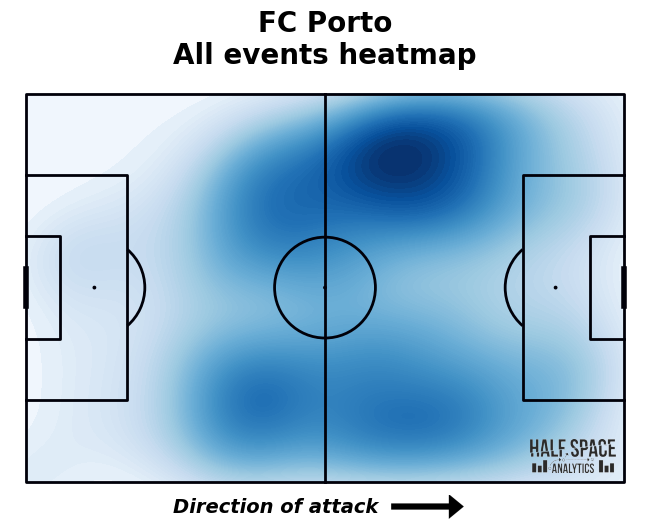

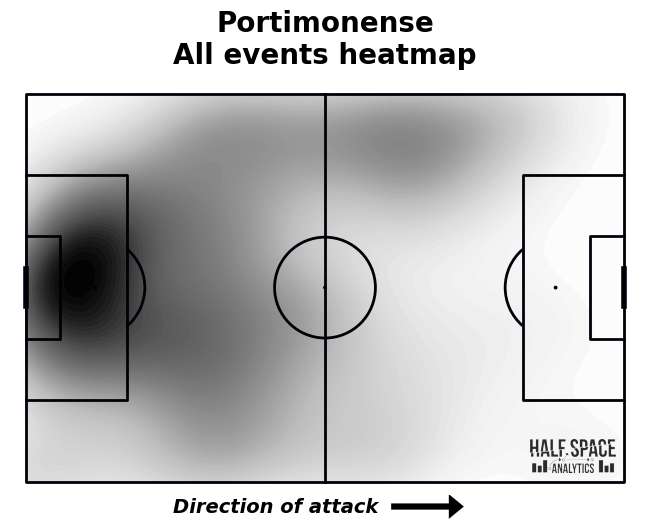

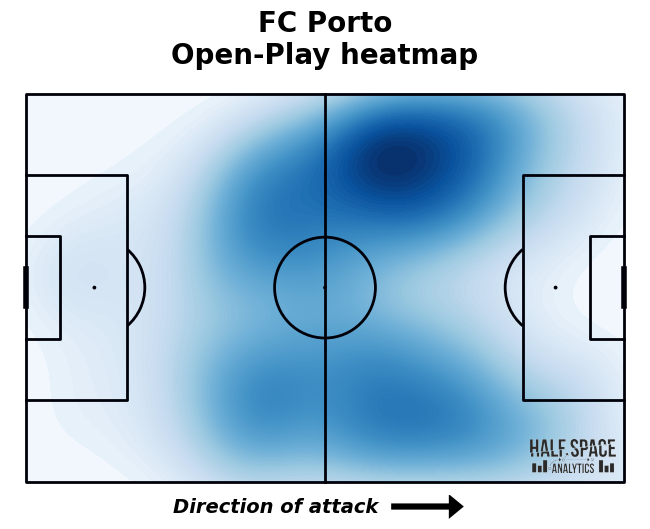

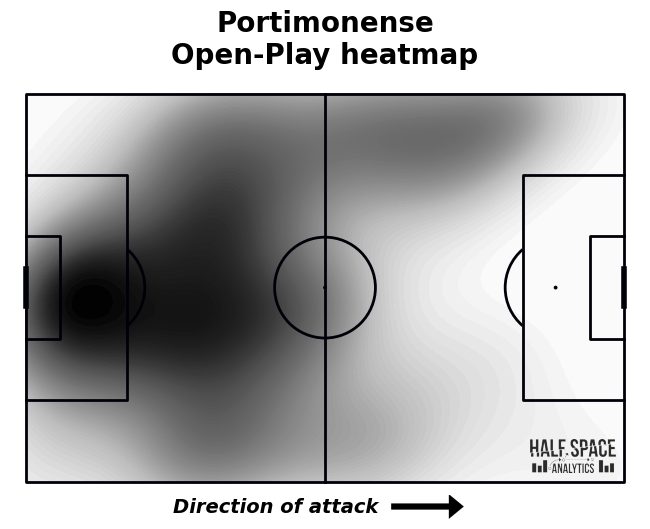

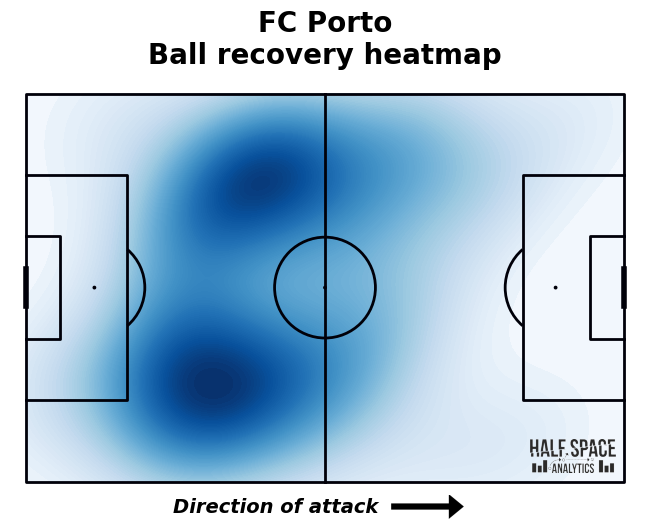

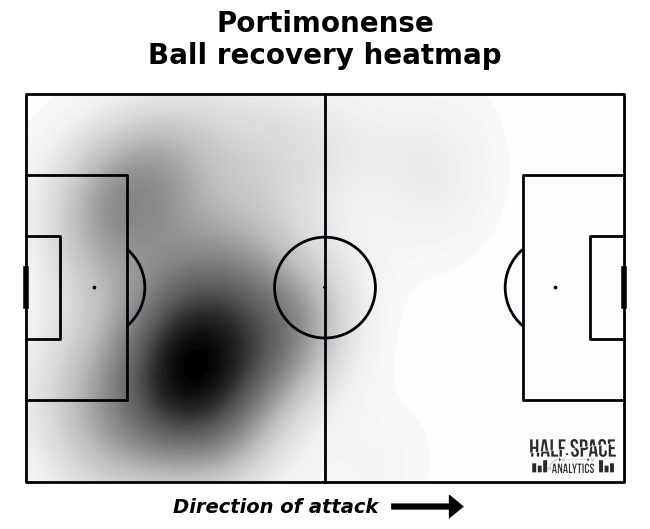

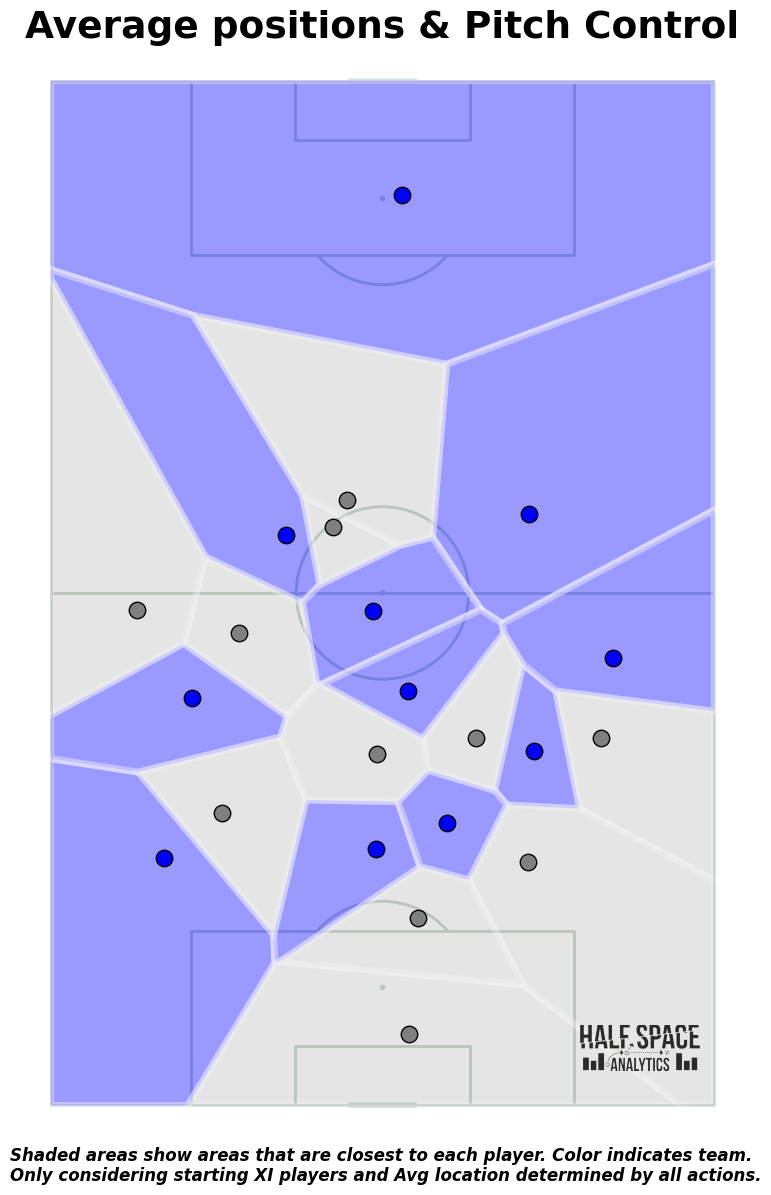

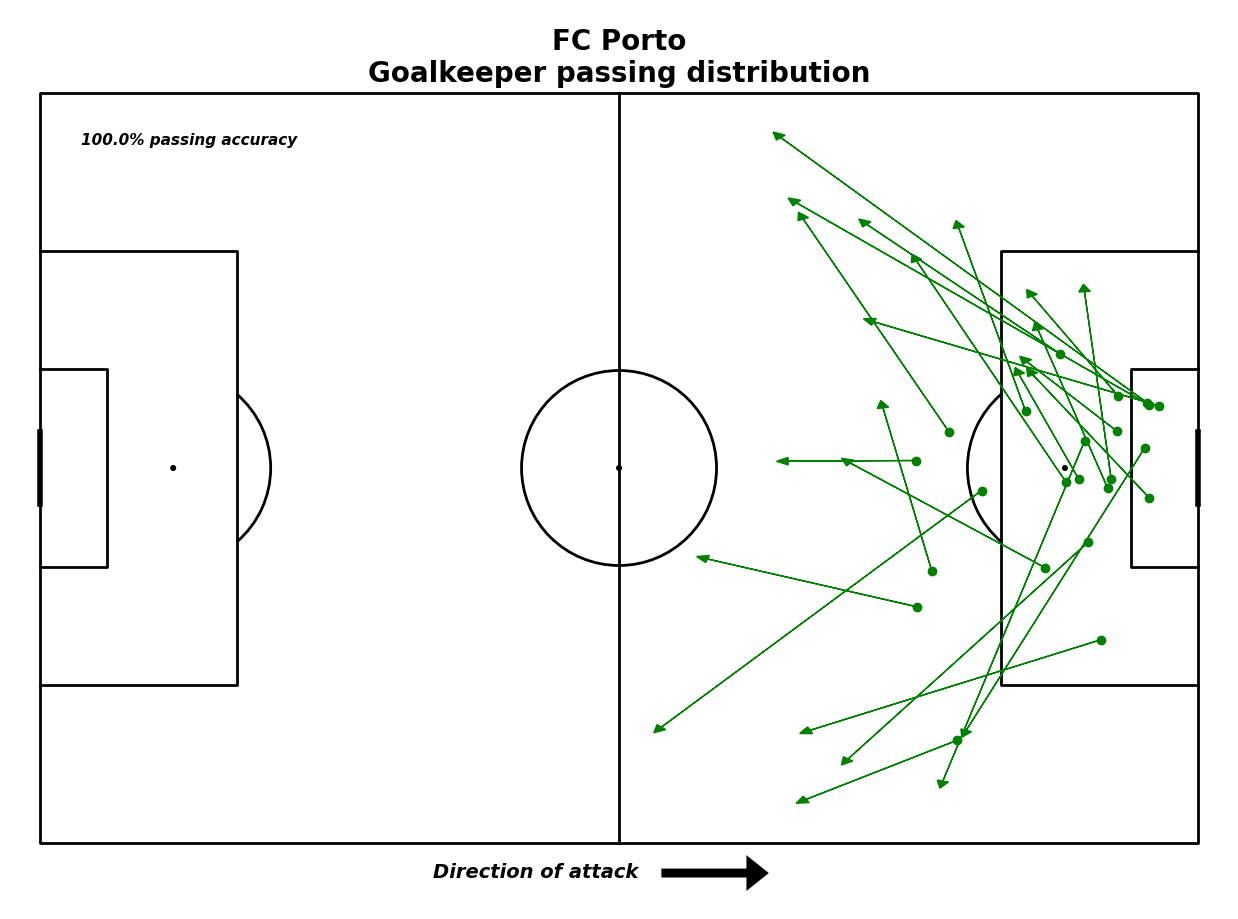

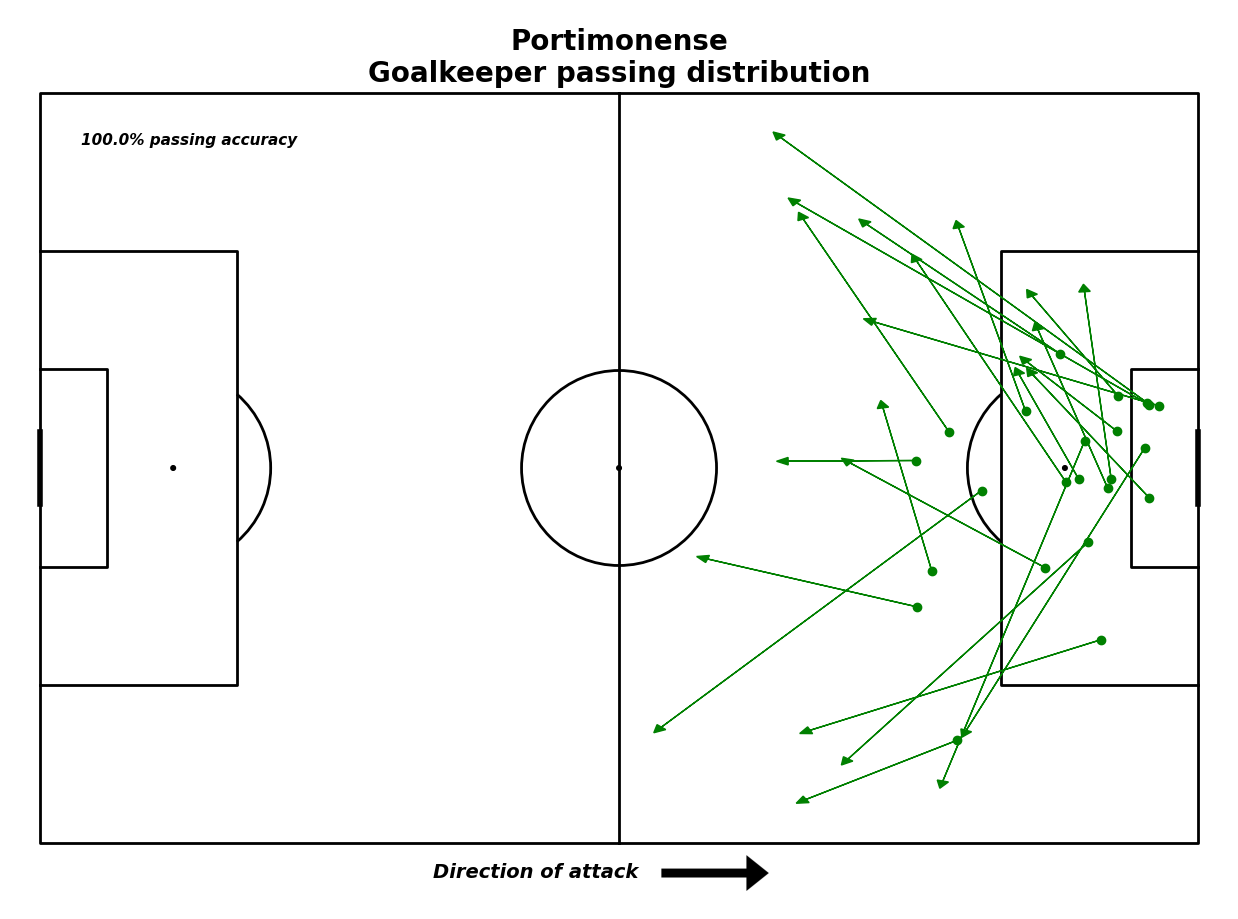

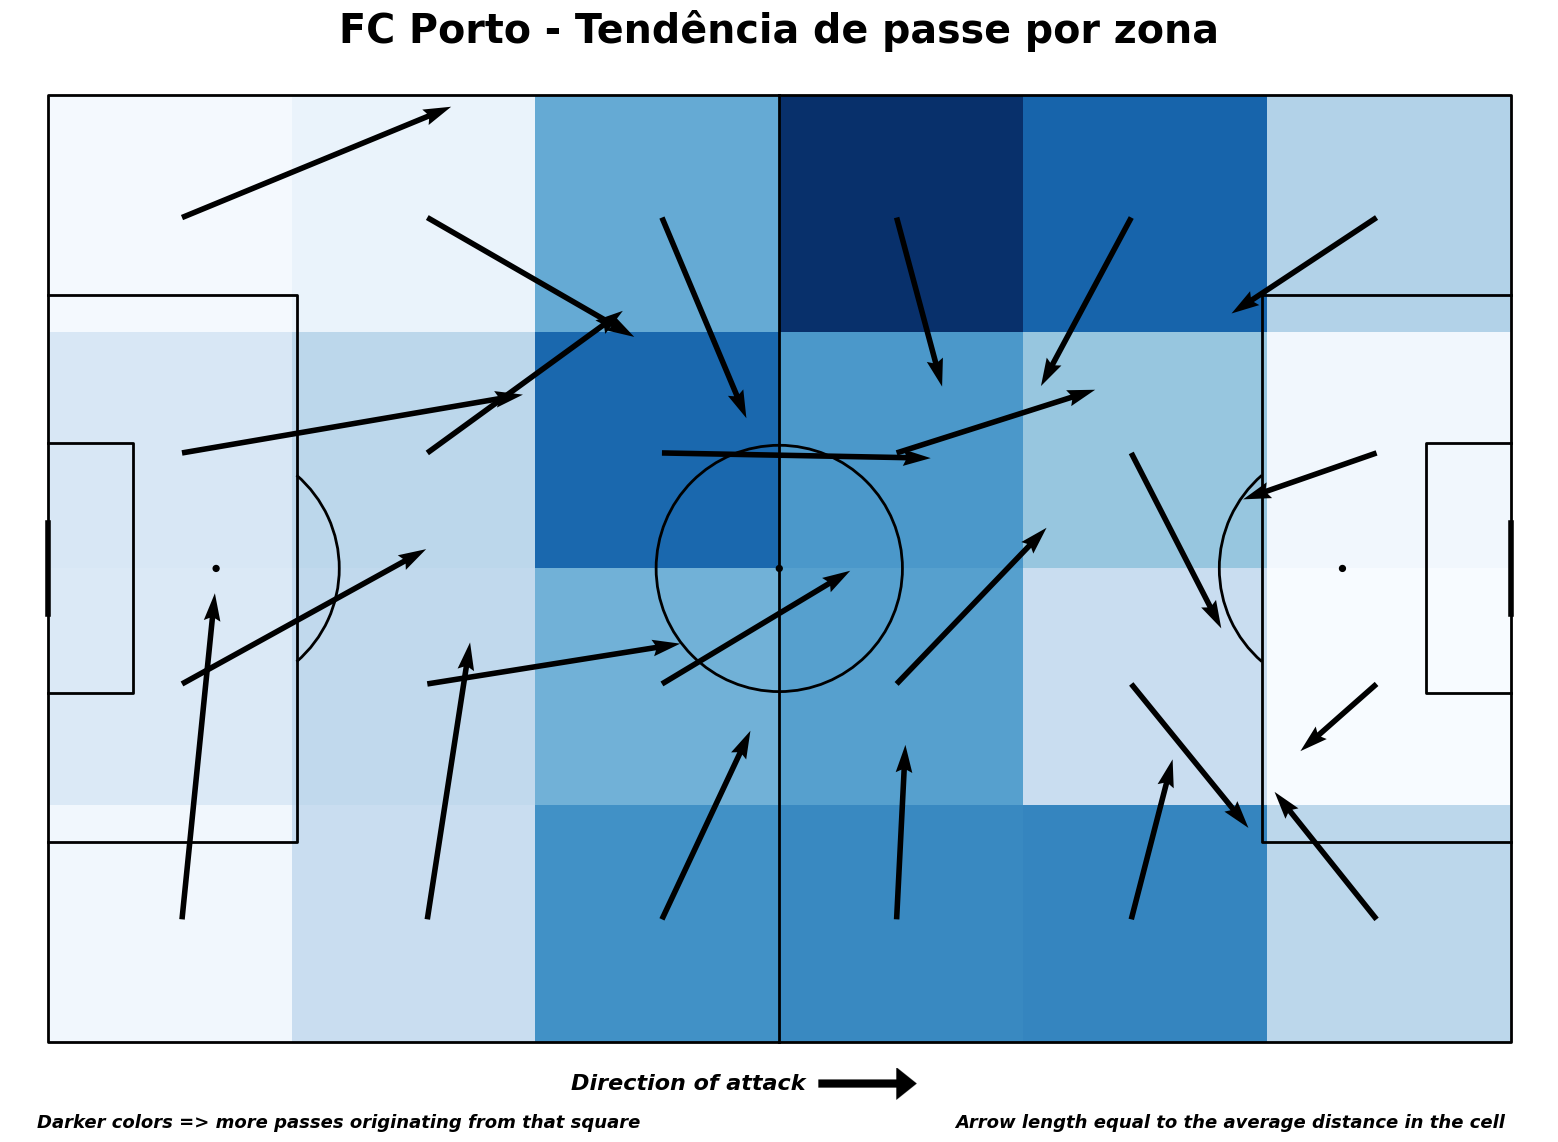

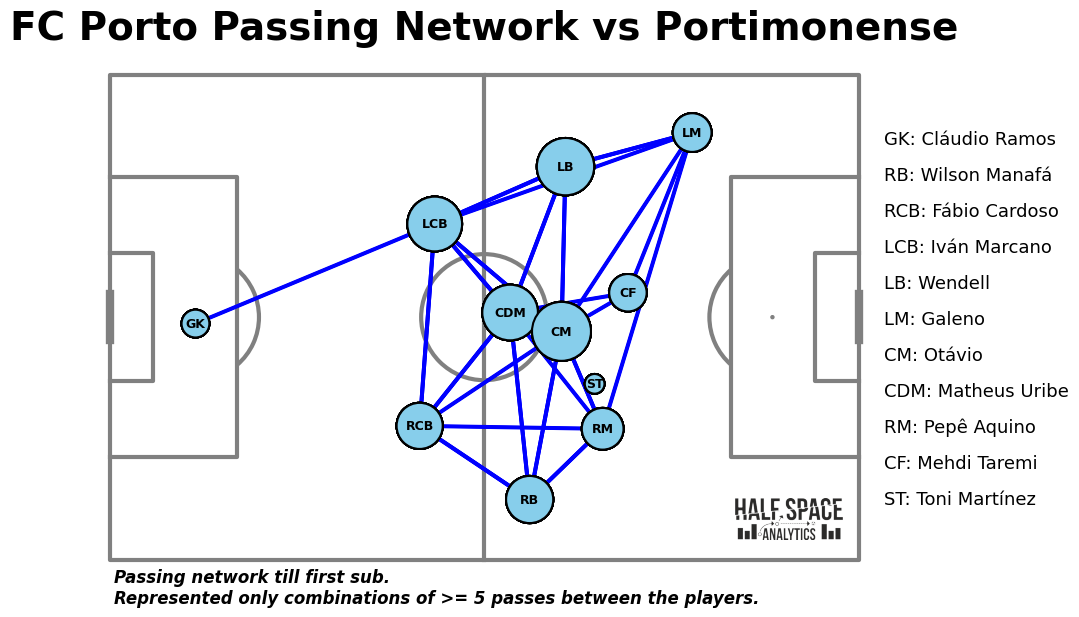

In [ ]:
team_heatmap_geral(hometeam_id, home_color +'s', hometeam_name + '\nAll events heatmap',df)
team_heatmap_geral(awayteam_id, away_color +'s', awayteam_name + '\nAll events heatmap',df)


team_heatmap_event(hometeam_id, 'Pass', home_color +'s', hometeam_name + '\nOpen-Play heatmap',df)
team_heatmap_event(awayteam_id, 'Pass', away_color +'s', awayteam_name + '\nOpen-Play heatmap',df)

team_heatmap_event(hometeam_id, 'BallRecovery', home_color +'s', hometeam_name + '\nBall recovery heatmap',df)
team_heatmap_event(awayteam_id, 'BallRecovery', away_color +'s', awayteam_name + '\nBall recovery heatmap',df)

voronoi_game(df, hometeam_id, awayteam_id, home_color, home_color, away_color, away_color)

generatePlayerPassMap('Cláudio Ramos', hometeam_name +'\nGoalkeeper passing distribution', df)
generatePlayerPassMap('Cláudio Ramos', awayteam_name +'\nGoalkeeper passing distribution', df)

passflow1(hometeam_id, home_color + 's',hometeam_name + ' - Tendência de passe por zona',df)
passflow1(awayteam_id, away_color + 's',awayteam_name + ' - Tendência de passe por zona',df)

passnetwork(df, formation_dict, hometeam_id, 'skyblue', 'blue', 'black')